In [ ]:
!pip install pydicom nilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 123.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pydicom as dcm
import nibabel as nib
import os

In [ ]:
from google.colab import drive
drive.mount('./content')

Mounted at ./content


In [ ]:
ls content/MyDrive/data

image_level_labels.csv                    test_images/
merged_df.csv                             test_series_meta.csv
rsna-2023-abdominal-trauma-detection.zip  train.csv
sample_submission.csv                     train_dicom_tags.parquet
segmentations/                            train_images/
test_dicom_tags.parquet                   train_series_meta.csv


In [ ]:
path = 'content/MyDrive/data'

In [ ]:
os.listdir(path)

['train_series_meta.csv',
 'segmentations',
 'image_level_labels.csv',
 'sample_submission.csv',
 'test_dicom_tags.parquet',
 'test_images',
 'test_series_meta.csv',
 'train.csv',
 'train_dicom_tags.parquet',
 'train_images',
 'rsna-2023-abdominal-trauma-detection.zip',
 'imgs']

In [ ]:
os.path.join(path, 'segmentations')

'content/MyDrive/data_/segmentations'

In [ ]:
train_df = pd.read_csv(path + '/train.csv')
train_dicom_df = pd.read_parquet(path + '/train_dicom_tags.parquet')
image_label_df = pd.read_csv(path + '/image_level_labels.csv')
train_meta_df = pd.read_csv(path + '/train_series_meta.csv')

In [ ]:
train_df.shape, train_dicom_df.shape, image_label_df.shape, train_meta_df.shape

((3147, 15), (1510373, 35), (12029, 4), (4711, 4))

In [ ]:
train_df.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1
1,10005,1,0,1,0,1,0,0,1,0,0,1,0,0,0
2,10007,1,0,1,0,1,0,0,1,0,0,1,0,0,0
3,10026,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,10051,1,0,1,0,1,0,0,1,0,0,0,1,0,1


In [ ]:
train_dicom_df.head()

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,FrameOfReferenceUID,HighBit,ImageOrientationPatient,ImagePositionPatient,InstanceNumber,...,WindowCenter,WindowWidth,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,TransferSyntaxUID,path,RescaleType
0,16,16,512,20230722,003306.881589,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1459.20]",532,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.532,1.2.840.10008.1.2.5,train_images/49954/41479/532.dcm,nan
1,16,16,512,20230722,003303.279137,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1474.40]",513,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.513,1.2.840.10008.1.2.5,train_images/49954/41479/513.dcm,nan
2,16,16,512,20230722,003343.090736,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1310.40]",718,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.718,1.2.840.10008.1.2.5,train_images/49954/41479/718.dcm,nan
3,16,16,512,20230722,003252.960345,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1520.00]",456,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.456,1.2.840.10008.1.2.5,train_images/49954/41479/456.dcm,nan
4,16,16,512,20230722,003155.059398,1.2.826.0.1.3680043.8.498.28466454913303094199...,15,"[1.00000, 0.00000, 0.00000, 0.00000, 1.00000, ...","[-235.8665, -235.8665, 1756.00]",161,...,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.49954.1.161,1.2.840.10008.1.2.5,train_images/49954/41479/161.dcm,nan


In [ ]:
image_label_df.head()

,patient_id,series_id,instance_number,injury_name
0,10004,21057,362,Active_Extravasation
1,10004,21057,363,Active_Extravasation
2,10004,21057,364,Active_Extravasation
3,10004,21057,365,Active_Extravasation
4,10004,21057,366,Active_Extravasation


In [ ]:
# 10004번 환자 id 1개
train_df[train_df['patient_id'] == 10004]

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1


In [ ]:
# 10004번 환자 id 이미지 라벨
len(image_label_df[image_label_df['patient_id'] == 10004])

105

In [ ]:
# patient_id 개수
len(image_label_df['patient_id'].unique())

246

In [ ]:
# dicom_df 환자 id 10004 의 개수
len(train_dicom_df[train_dicom_df['PatientID'] == '10004'])

2066

In [ ]:
# 보이는 컬럼 값 제한 풀기
pd.set_option('display.max_columns', None)

In [ ]:
train_dicom_df[train_dicom_df['PatientID'] == '10004']

,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,FrameOfReferenceUID,HighBit,ImageOrientationPatient,ImagePositionPatient,InstanceNumber,KVP,PatientID,PatientPosition,PhotometricInterpretation,PixelRepresentation,PixelSpacing,RescaleIntercept,RescaleSlope,Rows,SOPInstanceUID,SamplesPerPixel,SeriesInstanceUID,SeriesNumber,SliceThickness,StudyInstanceUID,WindowCenter,WindowWidth,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,TransferSyntaxUID,path,RescaleType
1458025,16,12,512,20230721,232720.393894,1.2.826.0.1.3680043.8.498.61841901354930484747...,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[-249.02441, -392.5244, -1362.8]",532,90.0,10004,HFS,MONOCHROME2,0,"[0.9511719, 0.9511719]",-1024.0,1.0,512,1.2.123.12345.1.2.3.10004.1.532,1,1.2.123.12345.1.2.3.10004.51033,9,1.0,1.2.123.12345.1.2.3.10004,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.10004.1.532,1.2.840.10008.1.2.5,train_images/10004/51033/532.dcm,HU
1458026,16,12,512,20230721,232717.009341,1.2.826.0.1.3680043.8.498.61841901354930484747...,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[-249.02441, -392.5244, -1353.3]",513,90.0,10004,HFS,MONOCHROME2,0,"[0.9511719, 0.9511719]",-1024.0,1.0,512,1.2.123.12345.1.2.3.10004.1.513,1,1.2.123.12345.1.2.3.10004.51033,9,1.0,1.2.123.12345.1.2.3.10004,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.10004.1.513,1.2.840.10008.1.2.5,train_images/10004/51033/513.dcm,HU
1458027,16,12,512,20230721,232756.009049,1.2.826.0.1.3680043.8.498.61841901354930484747...,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[-249.02441, -392.5244, -1455.8]",718,90.0,10004,HFS,MONOCHROME2,0,"[0.9511719, 0.9511719]",-1024.0,1.0,512,1.2.123.12345.1.2.3.10004.1.718,1,1.2.123.12345.1.2.3.10004.51033,9,1.0,1.2.123.12345.1.2.3.10004,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.10004.1.718,1.2.840.10008.1.2.5,train_images/10004/51033/718.dcm,HU
1458028,16,12,512,20230721,232910.902074,1.2.826.0.1.3680043.8.498.61841901354930484747...,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[-249.02441, -392.5244, -1641.8]",1090,90.0,10004,HFS,MONOCHROME2,0,"[0.9511719, 0.9511719]",-1024.0,1.0,512,1.2.123.12345.1.2.3.10004.1.1090,1,1.2.123.12345.1.2.3.10004.51033,9,1.0,1.2.123.12345.1.2.3.10004,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.10004.1.1090,1.2.840.10008.1.2.5,train_images/10004/51033/1090.dcm,HU
1458029,16,12,512,20230721,232706.496676,1.2.826.0.1.3680043.8.498.61841901354930484747...,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[-249.02441, -392.5244, -1324.8]",456,90.0,10004,HFS,MONOCHROME2,0,"[0.9511719, 0.9511719]",-1024.0,1.0,512,1.2.123.12345.1.2.3.10004.1.456,1,1.2.123.12345.1.2.3.10004.51033,9,1.0,1.2.123.12345.1.2.3.10004,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.10004.1.456,1.2.840.10008.1.2.5,train_images/10004/51033/456.dcm,HU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460086,16,12,512,20230721,232434.405476,1.2.826.0.1.3680043.8.498.61841901354930484747...,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[-240.55273, -378.05273, -1442.4]",683,90.0,10004,HFS,MONOCHROME2,0,"[0.89453125, 0.89453125]",-1024.0,1.0,512,1.2.123.12345.1.2.3.10004.1.683,1,1.2.123.12345.1.2.3.10004.21057,16,1.0,1.2.123.12345.1.2.3.10004,50.0,400.0, ,1.2.3.123456.4.5.1234.1.12.0,PYDICOM 2.4.0,1.2.840.10008.5.1.4.1.1.2,1.2.123.12345.1.2.3.10004.1.683,1.2.840.10008.1.2.5,train_images/10004/21057/683.dcm,HU
1460087,16,12,512,20230721,232539.441642,1.2.826.0.1.3680043.8.498.61841901354930484747...,11,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[-240.55273, -378.05273, -1623.9]",1046,90.0,10004,HFS,MONOCHROME2,0,"[0.89453125, 0.89453125]",-1024.0,1.0,512,1.2.123.12345.1.2.3.10004.1

# inner join

In [ ]:
df = pd.merge(train_df, image_label_df, how='inner')
df

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,362,Active_Extravasation
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,363,Active_Extravasation
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,364,Active_Extravasation
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,365,Active_Extravasation
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,366,Active_Extravasation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12024,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,155,Active_Extravasation
12025,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,156,Active_Extravasation
12026,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,157,Active_Extravasation
12027,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,158,Active_Extravasation


### path 컬럼 만들기

In [ ]:
df['path'] = "train_images/" +  df['patient_id'].astype(str) + "/" + df['series_id'].astype(str) + "/" + df['instance_number'].astype(str) + ".dcm"

In [ ]:
df

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,path
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,362,Active_Extravasation,train_images/10004/21057/362.dcm
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,363,Active_Extravasation,train_images/10004/21057/363.dcm
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,364,Active_Extravasation,train_images/10004/21057/364.dcm
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,365,Active_Extravasation,train_images/10004/21057/365.dcm
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,366,Active_Extravasation,train_images/10004/21057/366.dcm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12024,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,155,Active_Extravasation,train_images/9632/3750/155.dcm
12025,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,156,Active_Extravasation,train_images/9632/3750/156.dcm
12026,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,157,Active_Extravasation,train_images/9632/3750/157.dcm
12027,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,158,Active_Extravasation,train_images/9632/3750/158.dcm


### inner join

In [ ]:
df = pd.merge(df, train_meta_df, how='inner')
df

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,path,aortic_hu,incomplete_organ
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,362,Active_Extravasation,train_images/10004/21057/362.dcm,146.0,0
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,363,Active_Extravasation,train_images/10004/21057/363.dcm,146.0,0
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,364,Active_Extravasation,train_images/10004/21057/364.dcm,146.0,0
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,365,Active_Extravasation,train_images/10004/21057/365.dcm,146.0,0
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,366,Active_Extravasation,train_images/10004/21057/366.dcm,146.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12024,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,155,Active_Extravasation,train_images/9632/3750/155.dcm,272.0,0
12025,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,156,Active_Extravasation,train_images/9632/3750/156.dcm,272.0,0
12026,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,157,Active_Extravasation,train_images/9632/3750/157.dcm,272.0,0
12027,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,158,Active_Extravasation,train_images/9632/3750/158.dcm,272.0,0


In [ ]:
target_columns = ['bowel_healthy', 'bowel_injury',
                  'extravasation_healthy', 'extravasation_injury',
                  'kidney_healthy', 'kidney_low', 'kidney_high',
                  'liver_healthy', 'liver_low', 'liver_high',
                  'spleen_healthy', 'spleen_low', 'spleen_high']

### df 저장

In [ ]:
df.to_csv(path + '/merged_df.csv', encoding='utf-8-sig', index=False)

### 저장한 df 불러오기

In [ ]:
df = pd.read_csv(path + '/merged_df.csv')
df.head()

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,...,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,path,aortic_hu,incomplete_organ
0,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,362,Active_Extravasation,train_images/10004/21057/362.dcm,146.0,0
1,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,363,Active_Extravasation,train_images/10004/21057/363.dcm,146.0,0
2,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,364,Active_Extravasation,train_images/10004/21057/364.dcm,146.0,0
3,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,365,Active_Extravasation,train_images/10004/21057/365.dcm,146.0,0
4,10004,1,0,0,1,0,1,0,1,0,...,0,0,1,1,21057,366,Active_Extravasation,train_images/10004/21057/366.dcm,146.0,0


### image 확인

In [ ]:
raw_file = dcm.read_file(path + '/train_images/4331/58214/426.dcm')

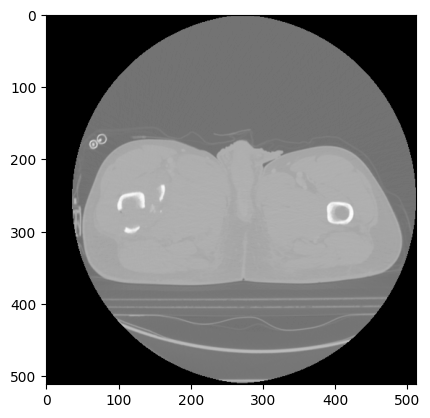

In [ ]:
plt.imshow(raw_file.pixel_array, cmap='gray');

In [ ]:
len(df['patient_id'].unique()), df['patient_id'].unique()

(246,
 array([10004, 10065, 10217, 10292, 10494, 10917, 10929, 11044, 11335,
        11379, 11474, 11652, 11925, 12008, 12192, 12210, 12332, 12875,
        12951, 12958, 13241, 13316, 13403, 13719, 13741, 14018, 14102,
        14321, 14788, 15117, 15188, 15419, 15472, 15876, 16327, 16436,
        16494, 16645, 16682,  1675, 17131, 17265,  1758, 17782, 18534,
        18682, 18697, 18779, 18877, 19139, 19247, 19249, 19366, 19742,
        19763, 19914, 20951, 21325,  2209, 22623, 22755, 23029, 24329,
        24439, 24524, 25289, 25347, 25353,  2602, 26074,   263, 26324,
        26468, 26575, 27037, 27196, 27421, 27555, 27701, 27922, 28433,
        28555, 28925, 28976, 29049, 29336, 29407, 29448, 29539, 29978,
        30698, 31474, 31636, 31749, 31781, 32011, 32081, 32272, 32379,
        32442, 32541,    33, 33251, 33848,  3401, 34140, 35022, 35187,
        35331, 35653, 35842, 36022, 36289, 36327, 36686, 37429, 37495,
        37802, 37942, 38045, 38129, 38336, 38343, 38427, 38541, 38982,


### dataframe의 path 컬럼의 값으로 시각화

In [ ]:
df[df['patient_id'] == 4331].iloc[0]

patient_id                                          4331
bowel_healthy                                          1
bowel_injury                                           0
extravasation_healthy                                  0
extravasation_injury                                   1
kidney_healthy                                         1
kidney_low                                             0
kidney_high                                            0
liver_healthy                                          1
liver_low                                              0
liver_high                                             0
spleen_healthy                                         1
spleen_low                                             0
spleen_high                                            0
any_injury                                             1
series_id                                          58214
instance_number                                      426
injury_name                    

In [ ]:
df[df['patient_id'] == 4331]['path'].iloc[0]

'train_images/4331/58214/426.dcm'

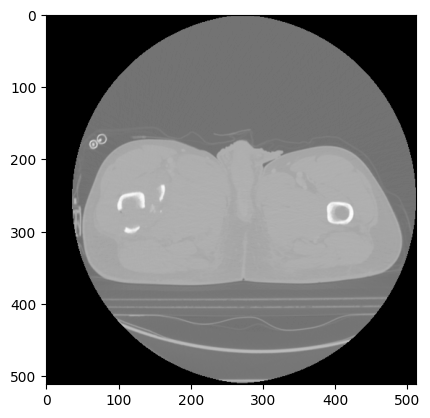

In [ ]:
plt.imshow(dcm.read_file(path + '/' + df[df['patient_id'] == 4331]['path'].iloc[0]).pixel_array, cmap='gray')

# zip 상태에서 원하는 것만 unzip 하기.

In [15]:
import zipfile
import os

In [18]:
zip_path = os.path.join(path, 'rsna-2023-abdominal-trauma-detection.zip')

In [20]:
os.mkdir(os.path.join(path, 'try_data'))

In [23]:
output_path = os.path.join(path, 'try_data')

In [22]:
folders = sorted(df.patient_id.unique())

In [30]:
with zipfile.ZipFile(zip_path, 'r') as zip:
    for folder_name in zip.namelist():
        # print(folder_name) # train_images/25899/21872/318.dcm
        for folder in folders:
            if folder_name.startswith(f'train_images/{folder}/'):
                zip.extract(folder_name, output_path)

KeyboardInterrupt: ignored

In [25]:
folders

[33,
 43,
 263,
 820,
 1675,
 1758,
 2209,
 2602,
 3401,
 4093,
 4331,
 4353,
 4639,
 4852,
 5337,
 5429,
 5649,
 5880,
 5914,
 6962,
 7026,
 7084,
 7411,
 7482,
 7642,
 7944,
 8263,
 8684,
 9528,
 9632,
 10004,
 10065,
 10217,
 10292,
 10494,
 10917,
 10929,
 11044,
 11335,
 11379,
 11474,
 11652,
 11925,
 12008,
 12192,
 12210,
 12332,
 12875,
 12951,
 12958,
 13241,
 13316,
 13403,
 13719,
 13741,
 14018,
 14102,
 14321,
 14788,
 15117,
 15188,
 15419,
 15472,
 15876,
 16327,
 16436,
 16494,
 16645,
 16682,
 17131,
 17265,
 17782,
 18534,
 18682,
 18697,
 18779,
 18877,
 19139,
 19247,
 19249,
 19366,
 19742,
 19763,
 19914,
 20951,
 21325,
 22623,
 22755,
 23029,
 24329,
 24439,
 24524,
 25289,
 25347,
 25353,
 26074,
 26324,
 26468,
 26575,
 27037,
 27196,
 27421,
 27555,
 27701,
 27922,
 28433,
 28555,
 28925,
 28976,
 29049,
 29336,
 29407,
 29448,
 29539,
 29978,
 30698,
 31474,
 31636,
 31749,
 31781,
 32011,
 32081,
 32272,
 32379,
 32442,
 32541,
 33251,
 33848,
 34140,
 350